<a href="https://colab.research.google.com/github/abduqodir-pulatov/class_works/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision import datasets , transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)


train_data = datasets.CIFAR10(
    root="data", train=True, download=True, transform=transforms
)
test_data = datasets.CIFAR10(
    root="data", train=False, download=True, transform=transforms
)

100%|██████████| 170M/170M [00:03<00:00, 42.7MB/s]


In [ ]:
target_names = test_data.classes
target_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
test_image = test_data[1][0]
test_label = test_data[1][1]

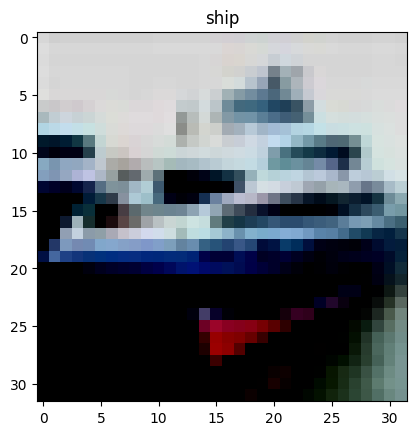

In [ ]:
plt.imshow(test_image.permute(1, 2, 0))
plt.title(target_names[test_label])
plt.show()

In [ ]:
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

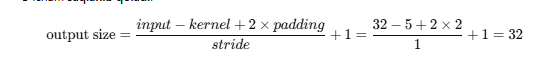

In [ ]:
import torch
import torch.nn as nn

# x = 32 x 32
# 32 - 3 = 29
# 29 + 1 = 30

# 30 - 3 = 27
# 27 + 1 = 28

# max pool
# 28 / 2 = 14

# linear

# 32 * 14 * 14 = > linear uchu =  input , output (optinonal)


class BAA32(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnns = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3),  # -> (16, 30, 30)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),  # -> (32, 8, 8)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),  # -> (32, 4, 4)

        )
        self.flatten = nn.Flatten()
        self.fnn = nn.Sequential(
            nn.Linear(in_features=32 * 6 * 6, out_features=256),
            nn.ReLU(),
            nn.Linear(in_features=256, out_features=10)
        )

    def forward(self, x):
        x = self.cnns(x)
        x = self.flatten(x)
        x = self.fnn(x)
        return x


In [ ]:
model = BAA32()

test_image = torch.rand(1, 3, 32, 32)
test_image.shape


torch.Size([1, 3, 32, 32])

In [ ]:
model(test_image).shape

torch.Size([1, 10])

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = model.to(device)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        # end forward

        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # end backward


        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size

    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")




In [ ]:
for epoch in range(10):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.786428  [   64/50000]
loss: 0.762157  [ 6464/50000]
loss: 0.602542  [12864/50000]
loss: 0.543522  [19264/50000]
loss: 0.592456  [25664/50000]
loss: 0.633864  [32064/50000]
loss: 0.510541  [38464/50000]
loss: 0.794589  [44864/50000]
Test Error: 
 Accuracy: 68.6%, Avg loss: 0.931756 

Epoch 2
-------------------------------
loss: 0.511079  [   64/50000]
loss: 0.469605  [ 6464/50000]
loss: 0.472842  [12864/50000]
loss: 0.475711  [19264/50000]
loss: 0.608382  [25664/50000]
loss: 0.482198  [32064/50000]
loss: 0.875630  [38464/50000]
loss: 0.490031  [44864/50000]
Test Error: 
 Accuracy: 70.0%, Avg loss: 0.909334 

Epoch 3
-------------------------------
loss: 0.579506  [   64/50000]
loss: 0.432471  [ 6464/50000]
loss: 0.449620  [12864/50000]
loss: 0.346296  [19264/50000]
loss: 0.588549  [25664/50000]
loss: 0.750127  [32064/50000]
loss: 0.513887  [38464/50000]
loss: 0.314418  [44864/50000]
Test Error: 
 Accuracy: 70.1%, Avg loss: 0.931991 

Epoc

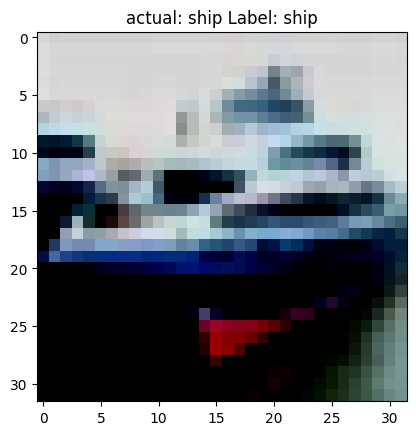

In [ ]:
test_image = test_data[1][0]
test_label = test_data[1][1]
test_image_test = test_image.unsqueeze(0).to(device)
label = model(test_image_test).argmax(1)
plt.imshow(test_image.permute(1, 2, 0))
plt.title(f"actual: {target_names[test_label]} Label: {target_names[label[0]]}")
plt.show()